In [17]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [18]:
xx = tf.Variable([1,2,3]) 
yy =tf.Variable([2,3,4]) 
ww  = xx+yy
ww.numpy()

array([3, 5, 7], dtype=int32)

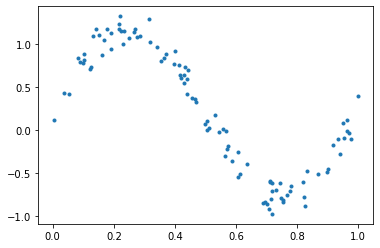

In [19]:
N = 100 
X = np.random.rand(N,1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N,1)
plt.plot(X,Y,'.')
plt.show()


1-W1-100-W2-100-W3-1

In [20]:
W1 = tf.Variable(np.random.randn(1,100))
b1 = tf.Variable(np.random.randn(100))
W2 = tf.Variable(np.random.randn(100,100))
b2 = tf.Variable(np.random.randn(100))
W3 = tf.Variable(np.random.randn(100,1))
b3 = tf.Variable(np.random.randn(1))

def relu(x):
  return tf.where(x>=0,x,0)

lr = 0.0001
for epoch in range(5000):
  with tf.GradientTape() as t:
    y = relu(X @ W1 + b1)
    y = relu(y @ W2 + b2)
    y = y @ W3 + b3
    loss = tf.reduce_mean((y-Y)**2)
  dw1,db1,dw2,db2,dw3,db3 = t.gradient(loss,[W1,b1,W2,b2,W3,b3])
  W1.assign_sub(lr * dw1)
  b1.assign_sub(lr * db1)
  W2.assign_sub(lr * dw2)
  b2.assign_sub(lr * db2)
  W3.assign_sub(lr * dw3)
  b3.assign_sub(lr * db3)
  if epoch % 1000 == 0:
    print(loss.numpy())


800.021955416691
0.04045312606387231
0.02574036704643641
0.020229739331946786
0.017651757272043305


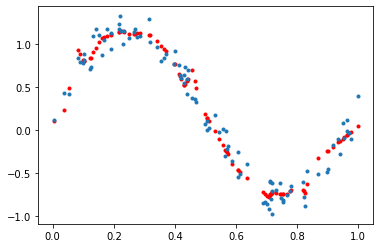

In [21]:
Z = relu(X@W1 + b1)
Z = relu(Z@W2 + b2)
Z = Z@W3 + b3 
plt.plot(X,Z,'.r')
plt.plot(X,Y,'.')
plt.show() 

Class Model

In [38]:
def relu(x):
  return tf.where(x>=0,x,0)

class MLP():
  def __init__(self,neurons=[1,100,100,1] , activation = [relu,relu,None]):
    self.W = []
    self.activation = activation
    for i in range(1 , len(neurons)):
      self.W.append(tf.Variable(np.random.randn(neurons[i-1],neurons[i])))
      self.W.append(tf.Variable(np.random.randn(neurons[i])))

  def __call__(self , x):
    for i in range(0 , len(self.W) ,2):
     x = x @ self.W[i] + self.W[i+1]
     if self.activation[i // 2] is not None:
       x = self.activation[i // 2](x)
    return x

  def fit(self, x, y, lr=0.001, epochs = 2000):
    for epoch in range(epochs):
      with tf.GradientTape() as t:
        loss = tf.reduce_mean((self(X) - Y) **2 )
      dw = t.gradient(loss, self.W) 
      for i , W in enumerate(self.W):
        W.assign_sub(lr*dw[i])
      if epoch % 1000 == 0 :
       print(epoch+100 , loss.numpy())

In [36]:
lr = 0.0001 
model  = MLP()
model.fit(X,Y,lr,7000)


0 93.66850115980286
1000 0.031073815217570057
2000 0.02108905704396987
3000 0.016768404144645633
4000 0.015492554445100913
5000 0.014812993160912707
6000 0.014407441158748743


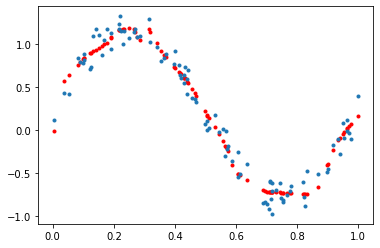

In [37]:
Z = model(X)
plt.plot(X,Z,'.r')
plt.plot(X,Y,'.')
plt.show() 

In [42]:
import  pandas as pd 

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

In [43]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
itrain = []
itest = []
x = df.iloc[:,:4].values
l = df.iloc[:,:-1].values
classes = np.unique(l) 
split = 0.5
y = []

